In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sts
import math
import pandas as pd
import matplotlib
from matplotlib import patches
from sympy import *
import datetime
from functools import reduce
from sklearn.datasets import make_spd_matrix, make_sparse_spd_matrix
import scipy

import sys

import itertools
from scipy.special import binom
from scipy.stats import ortho_group

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import math
import sklearn.metrics 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer as DV


from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, KFold

from sklearn.model_selection import train_test_split
from sklearn.datasets import load_svmlight_file

from itertools import cycle

In [51]:
def myrepr(x):
    return repr(round(x, 2)).replace('.',',') if isinstance(x, float) else repr(x)

In [60]:
from logreg_functions import *
from sigmoid_functions import *

bash commands

python3 generate_data.py --n_workers 3

mpirun -n 4 python3 sign_sgd_majority.py --upd_option one-point --loss_func log-reg --step_type var-step --max_it 2 --gamma_0 1



firstly lets find f_min of log-reg mushrooms

## sign_sgd_one_point_majority_log-reg_var

download all existent data

In [104]:
#full
project_path = "/Users/igorsokolov/Yandex.Disk.localized/MIPT/Science/Richtarik/signSGD/experiments/sign_sgd/"
experiment_name_short = "sign_sgd"
experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["mushrooms"]
loss_func_ar = ["log-reg"]
upd_option_ar = ["one-point", "two-point"]
step_type_ar = ["var-step", "fix-step"]
n_workers_ar = [3]
gamma_0_ar = [1.0]
batch_ar = [1]

clf_coef_ar = {}
X_train_ar = {}
y_train_ar = {}
la_ar = {}
f_min_ar = {}
info_num_ar = {}
loss_ar = {}
time_ar = {}
its_ar = {}
w_ar = {}
label_ar = {}

for experiment_name, dataset, loss_func, upd_option, step_type, n_workers, gamma_0, batch in \
itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar):
    experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)
    
    
    
    id_str = "{0}_{1}".format(dataset, experiment)#####
    id_func = "{0}_{1}".format(dataset, loss_func)#####
    id_dataset = "{0}_{1}".format(dataset, n_workers)#####
    id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)
    
    logs_path = project_path + "logs_{0}_{1}/".format(dataset, experiment)
    data_path = project_path + "data_{0}_{1}/".format(dataset, n_workers)
        
    if os.path.isfile(data_path + 'X.npy'):
        X_train_ar[id_dataset] = np.load(data_path + 'X.npy')
    if os.path.isfile(data_path + 'y.npy'):
        y_train_ar[id_dataset] = np.load(data_path + 'y.npy')
    
    if os.path.isfile(data_path + 'data_info.npy'): 
        data_info = np.load(data_path + 'data_info.npy')
        N, L = data_info[:2]
        if os.path.isfile(data_path + "clf_coef.npy"):
            clf_coef_ar[id_func] = np.load(data_path + "clf_coef.npy")
            f_min_ar[id_func] = logreg_loss (clf_coef, X_train, y_train, L)
    
    
    
    if os.path.isfile(logs_path + 'info_number' + "_" + experiment + ".npy"): 
        info_num_ar[id_str]    = np.load(logs_path + 'info_number' + "_" + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'loss' + "_" + experiment + ".npy"):
        loss_ar[id_str] = np.load(logs_path + 'loss' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'time' + "_" + experiment + ".npy"):
        time_ar[id_str]        = np.load(logs_path + 'time' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'iteration' + "_" + experiment + ".npy"):
        its_ar[id_str] = np.load(logs_path + 'iteration' + '_' + experiment + ".npy")
        
    if os.path.isfile(logs_path + 'iterates' + "_" + experiment + ".npy"):
        w_ar[id_str] = np.load(logs_path + 'iterates' + '_' + experiment + ".npy")
        
    label_ar[id_label] = id_label

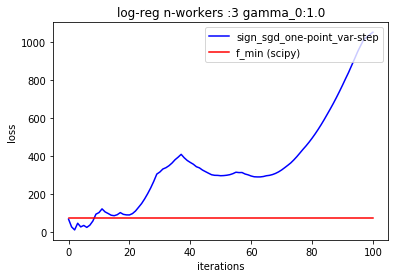

In [112]:
experiment_name_ar = ["sign_sgd_majority"]
dataset_ar = ["mushrooms"]
loss_func_ar = ["log-reg"]
upd_option_ar = ["one-point"]
step_type_ar = ["var-step"]
colors = ['blue', 'aqua', 'darkorange', 'cornflowerblue', 'red']

#plt.plot(its_ar[:np.argmin (loss_ar)], loss_ar[:np.argmin (loss_ar)], color=color, label=str(label_ar[0]))
for i, (experiment_name, dataset, loss_func, upd_option, step_type, n_workers, gamma_0, batch) in \
enumerate(itertools.product (experiment_name_ar, dataset_ar, loss_func_ar, upd_option_ar, step_type_ar, n_workers_ar, gamma_0_ar, batch_ar)):
    experiment = '{0}_{1}_{2}_{3}_{4}_{5}_{6}'.format(experiment_name, upd_option,loss_func, step_type, n_workers, myrepr(gamma_0), batch)
    
    id_str = "{0}_{1}".format(dataset, experiment)
    id_func = "{0}_{1}".format(dataset, loss_func)
    id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)
    id_label = "{0}_{1}_{2}".format(experiment_name_short, upd_option, step_type)
    
    plt.plot(its_ar[id_str], loss_ar[id_str], color=colors[i], label=label_ar[id_label])
    
    plt.plot(its_ar[id_str], [f_min_ar[id_func]]*its_ar[id_str].shape[0], color='red', label="f_min (scipy)")


#print("f_min: {0}".format(f_min))

plt.ylabel('loss')
plt.xlabel('iterations')

plt.title('{0} n-workers :{1} gamma_0:{2}'.format( loss_func, n_workers, gamma_0 ))
plt.legend(loc="upper right")
#plt.plot()

In [86]:
if 1 not in [0,2]: 
    print("lol") 

lol


[]

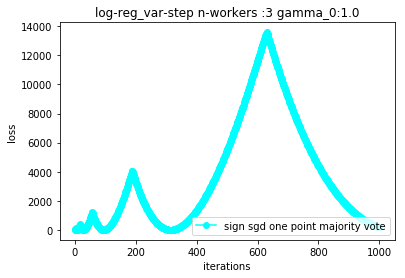

In [30]:
colors = cycle(['blue', 'aqua', 'darkorange', 'cornflowerblue', 'red'])

x_ar   = [its_ar]
y_ar = [loss_ar]

label_ar = ["sign sgd one point majority vote"]
marker_ar = ["o-"]

plt.plot(x_ar[0], y_ar[0],  marker_ar[0], color=color, label=str(label_ar[0]))

plt.ylabel('loss')
plt.xlabel('iterations')
plt.title('{0}_{1} n-workers :{2} gamma_0:{3}'.format( loss_func, stepsize, n_workers, gamma_0 ))
plt.legend(loc="lower right")
plt.plot()

    


TypeError: 'AxesSubplot' object is not subscriptable

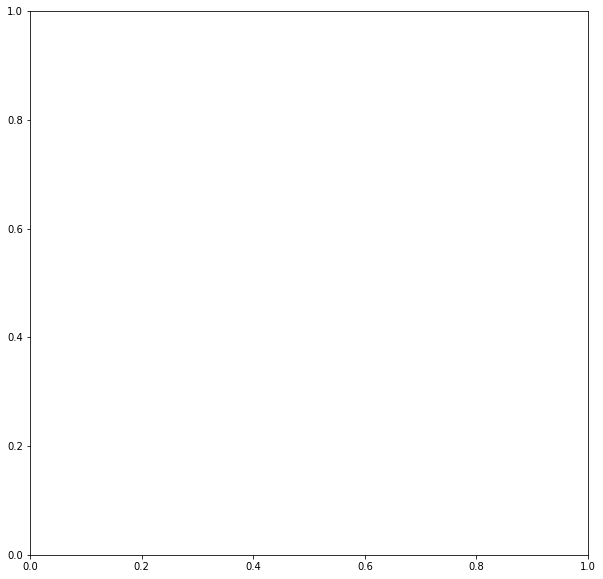

In [15]:
colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red'])

x_ar   = [its_ar]
y_ar = [loss_ar]

label_ar = ["sign sgd one point majority vote"]
marker_ar = ["o-"]

n_col = 1
n_row = 1
f, axarr = plt.subplots(n_row, n_col, figsize=(10, 10), sharex=False, sharey=False)

for i,j in itertools.product(range(n_row), range(n_col)):
    for k, (x, y, label, color, marker) in enumerate(zip(x_ar, y_ar, label_ar, colors, marker_ar)):
        axarr[i, j].plot(x, y, color=color, marker=marker, label=str(label_ar[k]))
                         
    axarr[i, j].set_title('{0}_{1} n-workers :{2} gamma_0:{3}'.format( loss_func, stepsize, n_workers, gamma_0 ))
    axarr[i, j].legend(loc="lower right")
                          
for ax in axarr.flat:
    ax.set(xlabel='iterations', ylabel='loss')

plt.show()

In [42]:
type("mushrooms")

str